In [1]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing import image
from similarities import get_similar_products, get_complementary_products

In [2]:
data_path = 'data/'
image_path = 'datathon/images/'

products = pd.read_csv(data_path + 'products_clean.csv')
outfits = pd.read_csv('datathon/dataset/outfit_data.csv')

In [3]:
pantalon = 'datathon/images/2019_41030739_56.jpg'
camisa = 'datathon/images/2019_41030739_56.jpg'
pantalon2 = 'datathon/images/2023_47003777_DC.jpg'

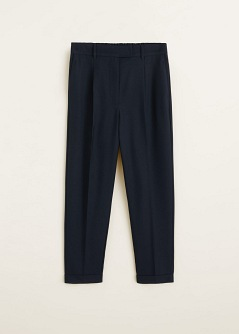

In [4]:
img = image.load_img(pantalon)
display(img)

In [5]:
print(pantalon)

datathon/images/2019_41030739_56.jpg


In [6]:
sim = get_similar_products(pantalon)
len(sim)

54

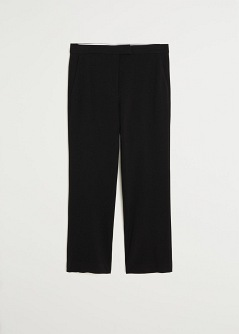

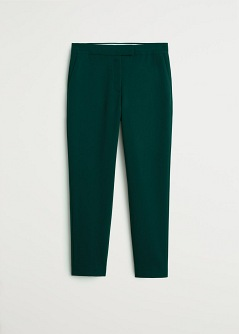

In [7]:
i = 0
for s in sim:
    img = image.load_img(s[0])
    display(img)

    i += 1
    if i == 2:
        break

In [8]:
sim_products, _ = zip(*sim)
comp = get_complementary_products(pantalon, sim_products, 'Shirt')
len(comp)

43

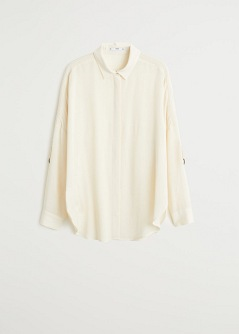

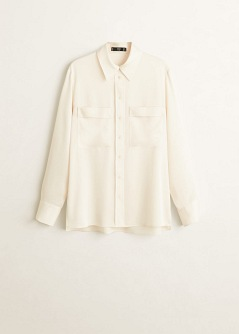

In [9]:
i = 0
for c in comp:
    img = image.load_img(c)
    display(img)

    i += 1
    if i == 2:
        break

---

In [10]:
files = os.listdir(image_path)

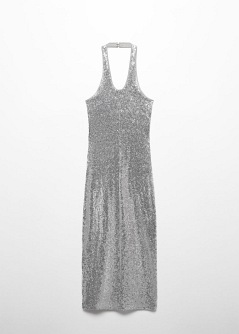

In [11]:
product = files[np.random.randint(len(files))]
img = image.load_img(image_path + product)
display(img)

In [12]:
product = 'datathon/images/' + product

In [13]:
sim = get_similar_products(product)[1:]
sim_products, _ = zip(*sim)
# for s in sim_products:
#     img = image.load_img(s)
#     display(img)

In [14]:
types = ['Trousers', 'Jeans', 'Dress', 'Shirt', 'Sweater', 'Skirt', 'Earrings', 'Bracelet', 'Shoes']

In [15]:
# products['des_product_type'].unique()

In [16]:
poss = {}
for t in types:
    comp = get_complementary_products(product, sim_products, t)
    poss[t] = comp

Trousers 1


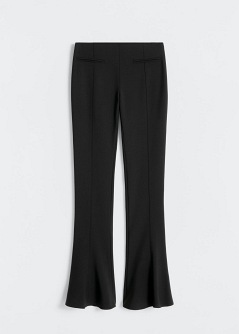

Jeans 0
There are no Jeanss for this product
Dress 16


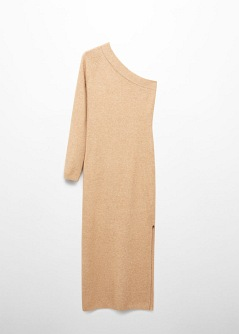

Shirt 0
There are no Shirts for this product
Sweater 1


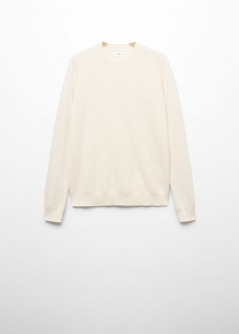

Skirt 0
There are no Skirts for this product
Earrings 16


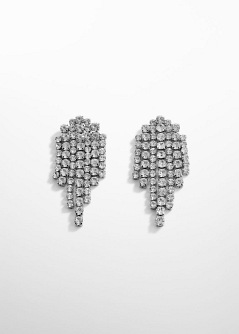

Bracelet 1


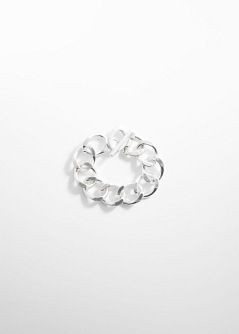

Shoes 10


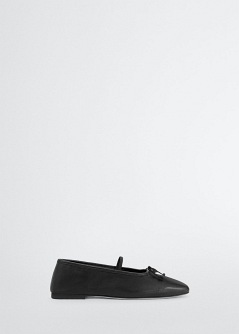

In [25]:
import random

for t in types:
    print(t, len(poss[t]))
    if len(poss[t]) > 0:
        img = image.load_img(poss[t][random.randint(0, len(poss[t]) - 1)])
        display(img)
    else:
        print(f'There are no {t}s for this product')